In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import nltk

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv('/content/gdrive/My Drive/WELFake_Dataset.csv')

In [ ]:
display(data)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
data=data.rename(columns={'Unnamed: 0':'index_no','label':'class'})

In [ ]:
display(data)

,index_no,title,text,class
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
data=data.drop(['index_no','title'],axis=1)
display(data.columns)

Index(['text', 'class'], dtype='object')

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
data.dropna(inplace = True)

In [ ]:
data['text']=data['text'].astype(str)

In [ ]:
display(data['text'])

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72095, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Tokenization

In [ ]:
data['text']=data['text'].apply(word_tokenize)

In [ ]:
display(data['text'])

0        [No, comment, is, expected, from, Barack, Obam...
1        [Did, they, post, their, votes, for, Hillary, ...
2        [Now, ,, most, of, the, demonstrators, gathere...
3        [A, dozen, politically, active, pastors, came,...
4        [The, RS-28, Sarmat, missile, ,, dubbed, Satan...
                               ...                        
72129    [WASHINGTON, (, Reuters, ), -, Hackers, believ...
72130    [You, know, ,, because, in, fantasyland, Repub...
72131    [Migrants, Refuse, To, Leave, Train, At, Refug...
72132    [MEXICO, CITY, (, Reuters, ), -, Donald, Trump...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, F...
Name: text, Length: 72095, dtype: object

# Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer
porter=SnowballStemmer("english")
def stem_it(text):
    return [porter.stem(word) for word in text]
data['text']=data['text'].apply(stem_it)
print(data.head(10))

                                                text  class
0  [no, comment, is, expect, from, barack, obama,...      1
1  [did, they, post, their, vote, for, hillari, a...      1
2  [now, ,, most, of, the, demonstr, gather, last...      1
3  [a, dozen, polit, activ, pastor, came, here, f...      0
4  [the, rs-28, sarmat, missil, ,, dub, satan, 2,...      1
5  [all, we, can, say, on, this, one, is, it, s, ...      1
6  [dr., ben, carson, tell, the, stori, of, what,...      1
7                                                 []      1
8  [the, owner, of, the, ringl, bar, ,, locat, so...      1
9  [file, –, in, this, sept., 15, ,, 2005, file, ...      1


# Stopword Removal

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def stop_it(text):
    dt=[word for word in text if len(word)>2]
    return dt
data['text']=data['text'].apply(stop_it)
print(data.head(10))    

                                                text  class
0  [comment, expect, from, barack, obama, member,...      1
1  [did, they, post, their, vote, for, hillari, a...      1
2  [now, most, the, demonstr, gather, last, night...      1
3  [dozen, polit, activ, pastor, came, here, for,...      0
4  [the, rs-28, sarmat, missil, dub, satan, will,...      1
5  [all, can, say, this, one, about, time, someon...      1
6  [dr., ben, carson, tell, the, stori, what, hap...      1
7                                                 []      1
8  [the, owner, the, ringl, bar, locat, south, wh...      1
9  [file, this, sept., 2005, file, photo, the, ma...      1


In [ ]:
data.dropna(inplace = True)

# Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data['text'],data['class'],test_size=0.3)
display(X_train.head())
print('\n')
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))
print(X_train)
print("\n")

52242    [the, insati, 24/7, news, cycl, bolster, cellp...
6463     [kris, kristofferson, dementia, turn, out, som...
9332     [new, york, reuter, group, u.s.-bas, scientist...
23031    [washington, reuter, concern, about, coordin, ...
27294    [written, patricia, lile, contact, her, scorpi...
Name: text, dtype: object



52242    the insati 24/7 news cycl bolster cellphon bod...
6463     kris kristofferson dementia turn out someth co...
9332     new york reuter group u.s.-bas scientist whose...
23031    washington reuter concern about coordin u.s. d...
27294    written patricia lile contact her scorpio new ...
                               ...                        
12645    donald trump onc again bulli nbc correspond ka...
44590    mayor rahm emanuel administr chicago launch re...
55430    whi hillari n't unleash wwiii pepe escobar oct...
51713    author topic obsolet 2016 read time member and...
64893    reuter u.s. democrat presidenti candid hillari...
Name: text, Length: 50466, dtype: object




In [ ]:
print(Y_test.value_counts())

1    11129
0    10500
Name: class, dtype: int64


# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
my_tfidf=TfidfVectorizer(max_df=0.6)
tfidf_train=my_tfidf.fit_transform(X_train)
tfidf_test=my_tfidf.transform(X_test)
print(tfidf_train)

  (0, 149825)	0.03131632997194416
  (0, 37622)	0.024370643119864432
  (0, 105697)	0.018153764495703613
  (0, 141877)	0.04119452645873607
  (0, 76717)	0.03805948045656043
  (0, 53734)	0.019282783553591958
  (0, 12523)	0.012038767255202735
  (0, 51129)	0.025694558599466562
  (0, 121638)	0.029368647175067868
  (0, 36112)	0.024283741124925606
  (0, 102091)	0.012256775978823178
  (0, 40616)	0.025483195561281893
  (0, 117122)	0.07101541855687968
  (0, 59705)	0.03987044416900481
  (0, 36141)	0.06202690792693308
  (0, 105217)	0.032451919321318586
  (0, 142773)	0.021987533455752092
  (0, 33872)	0.025263941234162795
  (0, 131454)	0.02546220655715369
  (0, 33953)	0.023163579753509016
  (0, 55062)	0.02265822583107524
  (0, 106192)	0.035941391885848245
  (0, 115908)	0.013580299235161155
  (0, 74093)	0.022590573021568916
  (0, 39959)	0.03959339630926396
  :	:
  (50465, 64441)	0.03193530569938343
  (50465, 27506)	0.04360984538016494
  (50465, 41170)	0.0657893580346308
  (50465, 70954)	0.0367173006492

# RANDOM FOREST ALGORITHM

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

Precision: 0.923 / Recall: 0.945 / F1-Score: 0.934 / Accuracy: 0.931


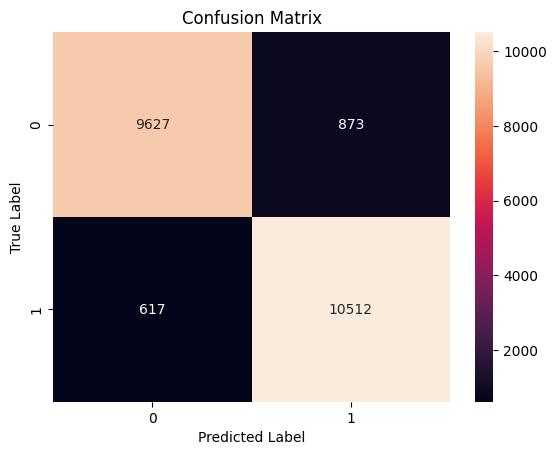

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(tfidf_train, Y_train)

y_pred = rf_model.predict(tfidf_test)

precision, recall, fscore, train_support = score(Y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(fscore,3), round(acs(Y_test,y_pred), 3)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#PIPELINE

Accuracy of Pipeline: 97.04%

Confusion Matrix of pipeline:



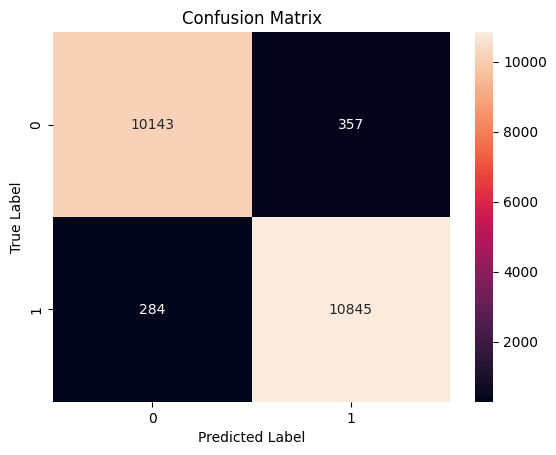


Classification Report of pipeline:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     10500
           1       0.97      0.97      0.97     11129

    accuracy                           0.97     21629
   macro avg       0.97      0.97      0.97     21629
weighted avg       0.97      0.97      0.97     21629



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LinearSVC())])
model_svc = pipe.fit(X_train, Y_train)
svc_pred = model_svc.predict(X_test)

print("Accuracy of Pipeline: {}%".format(round(accuracy_score(Y_test, svc_pred)*100,2)))
print("\nConfusion Matrix of pipeline:\n")
cm = confusion_matrix(Y_test, svc_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nClassification Report of pipeline:\n")
print(classification_report(Y_test, svc_pred))